In [ ]:
# 

In [2]:
import h5pyd
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.spatial import cKDTree

# Open the desired year of nsrdb data
# server endpoint, username, password is found via a config file
f = h5py.File('dataset/tmy2020.h5', 'r')
list(f.keys())


['air_temperature',
 'alpha',
 'aod',
 'asymmetry',
 'cld_opd_dcomp',
 'cld_reff_dcomp',
 'clearsky_dhi',
 'clearsky_dni',
 'clearsky_ghi',
 'cloud_press_acha',
 'cloud_type',
 'coordinates',
 'dew_point',
 'dhi',
 'dni',
 'fill_flag',
 'ghi',
 'meta',
 'ozone',
 'relative_humidity',
 'solar_zenith_angle',
 'ssa',
 'surface_albedo',
 'surface_pressure',
 'time_index',
 'tmy_year',
 'tmy_year_short',
 'total_precipitable_water',
 'wind_direction',
 'wind_speed']

In [3]:
clearsky_ghidset = f['clearsky_ghi']
clearsky_ghidset_attr = clearsky_ghidset.attrs
clearsky_ghidset[0:10]
clearsky_ghidset.shape

(8760, 2018392)

In [4]:
for k,v in clearsky_ghidset_attr.items():
    print(str(k) + ' , ' + str(v))


data_source , output
elevation_correction , False
physical_max , 1350.0
physical_min , 0.0
psm_scale_factor , 1.0
psm_units , W/m2
scale_factor , 1.0
spatial_interp_method , nan
temporal_interp_method , nan
units , W/m2


In [43]:
wind_speed = f['wind_speed']
wind_speed_attr = wind_speed.attrs
wind_speed[0:10]
wind_speed.shape

air_temperature = f['air_temperature']
air_temperature_attr = air_temperature.attrs
air_temperature[0:10]
air_temperature.shape

(8760, 2018392)

In [10]:
time_index = pd.to_datetime(f['time_index'][...].astype(str))
print(len(time_index))

dset_ghi = f['ghi']
dict_data = {}

for i in range(0, len(time_index), 365):
    #print('time index ' + str(i))
    rows = dset_ghi[i, ::1]
    dict_data[str(i)] = rows
    print('time index ' + str(i) + ' ' + str(rows) + ' ' + str(len(rows)))

dict_data
#df['longitude'] = coords[::10, 1]
#df['latitude'] = coords[::10, 0]

df = pd.DataFrame(dict_data) # Combine data with coordinates in a DataFrame

df.head()

8760
time index 0 [1063 1047  634 ...  534  533  534] 2018392
time index 365 [104 118  93 ...   0   0   0] 2018392
time index 730 [0 0 0 ... 0 0 0] 2018392
time index 1095 [0 0 0 ... 0 0 0] 2018392
time index 1460 [500 510 545 ... 489 468 490] 2018392
time index 1825 [ 749  748  177 ... 1403 1358 1403] 2018392
time index 2190 [0 0 0 ... 0 0 0] 2018392
time index 2555 [0 0 0 ... 0 0 0] 2018392
time index 2920 [0 0 0 ... 0 0 0] 2018392
time index 3285 [ 105  105  473 ... 1694 1698 1694] 2018392
time index 3650 [ 465  310  464 ... 1847 1856 1847] 2018392
time index 4015 [  0   0   0 ... 129 131 129] 2018392
time index 4380 [0 0 0 ... 0 0 0] 2018392
time index 4745 [  0   0   0 ... 293 295 294] 2018392
time index 5110 [ 543  506  606 ... 1682 1688 1683] 2018392
time index 5475 [ 155  154  371 ... 1146 1151 1145] 2018392
time index 5840 [0 0 0 ... 0 0 0] 2018392
time index 6205 [0 0 0 ... 0 0 0] 2018392
time index 6570 [166 167  28 ...  72  71  72] 2018392
time index 6935 [ 991  991  802 ..

,0,365,730,1095,1460,1825,2190,2555,2920,3285,...,5110,5475,5840,6205,6570,6935,7300,7665,8030,8395
0,1063,104,0,0,500,749,0,0,0,105,...,543,155,0,0,166,991,249,0,0,446
1,1047,118,0,0,510,748,0,0,0,105,...,506,154,0,0,167,991,248,0,0,446
2,634,93,0,0,545,177,0,0,0,473,...,606,371,0,0,28,802,247,0,0,330
3,678,100,0,0,534,367,0,0,0,540,...,747,209,0,0,161,990,257,0,0,449
4,1068,79,0,0,535,318,0,0,0,511,...,747,173,0,0,223,990,186,0,0,10


In [16]:
df.head()
df.mean(axis=1)

0          230.666667
1          222.916667
2          198.750000
3          223.583333
4          215.583333
              ...    
2018387    432.375000
2018388    433.500000
2018389    431.500000
2018390    429.916667
2018391    431.583333
Length: 2018392, dtype: float64

In [50]:
dset_coords = f['coordinates'][...]
tree = cKDTree(dset_coords)
def nearest_site(tree, lat_coord, lon_coord):
    lat_lon = np.array([lat_coord, lon_coord])
    dist, pos = tree.query(lat_lon)
    return pos

NewYorkCity = (45.1813645,-69.2743143)
NewYorkCity_idx = nearest_site(tree, NewYorkCity[0], NewYorkCity[1] )
NewYorkCity_idx

1398800

In [53]:
for k,v in air_temperature_attr.items():
    print(str(k) + ' , ' + str(v))

f['air_temperature'][10][1398800] / air_temperature_attr['psm_scale_factor']

data_source , MERRA2
elevation_correction , True
physical_max , 70.0
physical_min , -100.0
psm_scale_factor , 10.0
psm_units , Celsius
scale_factor , 10.0
spatial_interp_method , IDW2
temporal_interp_method , linear
units , Celsius


-12.0

In [54]:
coordinates = f['coordinates']
coordinates_attr = coordinates.attrs
coordinates[0:10]

array([[ -19.99, -175.26],
       [ -19.99, -175.22],
       [ -19.99, -175.18],
       [ -19.99, -175.14],
       [ -19.99, -175.1 ],
       [ -19.99, -175.06],
       [ -19.99, -175.02],
       [ -19.99, -174.98],
       [ -19.99, -174.94],
       [ -19.99, -174.9 ]], dtype=float32)

In [42]:
# Extract datetime index for datasets
time_index = pd.to_datetime(f['time_index'][...].astype(str))
time_index # Temporal resolution is 30min

DatetimeIndex(['2020-01-01 00:30:00+00:00', '2020-01-01 01:30:00+00:00',
               '2020-01-01 02:30:00+00:00', '2020-01-01 03:30:00+00:00',
               '2020-01-01 04:30:00+00:00', '2020-01-01 05:30:00+00:00',
               '2020-01-01 06:30:00+00:00', '2020-01-01 07:30:00+00:00',
               '2020-01-01 08:30:00+00:00', '2020-01-01 09:30:00+00:00',
               ...
               '2020-12-31 14:30:00+00:00', '2020-12-31 15:30:00+00:00',
               '2020-12-31 16:30:00+00:00', '2020-12-31 17:30:00+00:00',
               '2020-12-31 18:30:00+00:00', '2020-12-31 19:30:00+00:00',
               '2020-12-31 20:30:00+00:00', '2020-12-31 21:30:00+00:00',
               '2020-12-31 22:30:00+00:00', '2020-12-31 23:30:00+00:00'],
              dtype='datetime64[ns, UTC]', length=8760, freq=None)

In [47]:
# Locational information is stored in either 'meta' or 'coordinates'
meta = pd.DataFrame(f['meta'][...])
meta.head()

,latitude,longitude,elevation,timezone,country,state,county,urban,population,landcover
0,-19.99,-175.259995,0.0,13,b'None',b'None',b'None',b'None',-9999,210
1,-19.99,-175.220001,0.0,13,b'None',b'None',b'None',b'None',-9999,210
2,-19.99,-175.179993,0.0,13,b'None',b'None',b'None',b'None',-9999,210
3,-19.99,-175.139999,0.0,13,b'None',b'None',b'None',b'None',-9999,210
4,-19.99,-175.100006,0.0,13,b'None',b'None',b'None',b'None',-9999,210


In [69]:
# Extract coordinates (lat, lon)
#print(dict(f['coordinates'].attrs))
coords = f['coordinates'][...]
#coords.shape
#pd_coords = pd.DataFrame(coords)
#pd_coords.head()

(2018392, 2)

In [63]:
time_index = pd.to_datetime(f['time_index'][...].astype(str))
time_index


DatetimeIndex(['2020-01-01 00:30:00+00:00', '2020-01-01 01:30:00+00:00',
               '2020-01-01 02:30:00+00:00', '2020-01-01 03:30:00+00:00',
               '2020-01-01 04:30:00+00:00', '2020-01-01 05:30:00+00:00',
               '2020-01-01 06:30:00+00:00', '2020-01-01 07:30:00+00:00',
               '2020-01-01 08:30:00+00:00', '2020-01-01 09:30:00+00:00',
               ...
               '2020-12-31 14:30:00+00:00', '2020-12-31 15:30:00+00:00',
               '2020-12-31 16:30:00+00:00', '2020-12-31 17:30:00+00:00',
               '2020-12-31 18:30:00+00:00', '2020-12-31 19:30:00+00:00',
               '2020-12-31 20:30:00+00:00', '2020-12-31 21:30:00+00:00',
               '2020-12-31 22:30:00+00:00', '2020-12-31 23:30:00+00:00'],
              dtype='datetime64[ns, UTC]', length=8760, freq=None)

In [83]:
timestep = np.where(time_index == '2020-01-31 00:30:00')[0][0]
timestep
dset = f['ghi']
%time data = dset[timestep, ::10]   # extract every 10th location at a particular time
df = pd.DataFrame() # Combine data with coordinates in a DataFrame
df['longitude'] = coords[::10, 1]
df['latitude'] = coords[::10, 0]
df['ghi'] = data / dset.attrs['psm_scale_factor'] # unscale dataset
df.head()

CPU times: user 348 ms, sys: 332 ms, total: 679 ms
Wall time: 13.9 s


,longitude,latitude,ghi
0,-175.259995,-19.99,123.0
1,-174.860001,-19.99,719.0
2,-174.179993,-19.99,1056.0
3,-158.139999,-19.99,737.0
4,-157.740005,-19.99,621.0


In [63]:
timestep = np.where(time_index == '2020-01-01 00:30:00')[0][0]
timestep
dset = f['ghi']
%time data = dset[timestep, ::10]   # extract every 10th location at a particular time
df = pd.DataFrame() # Combine data with coordinates in a DataFrame
df['longitude'] = coords[::10, 1]
df['latitude'] = coords[::10, 0]
df['ghi'] = data / dset.attrs['psm_scale_factor'] # unscale dataset

CPU times: user 184 ms, sys: 97.2 ms, total: 282 ms
Wall time: 280 ms


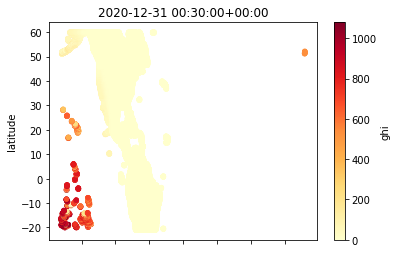

In [80]:
df.plot.scatter(x='longitude', y='latitude', c='ghi',
                colormap='YlOrRd',
                title=str(time_index[timestep]))
plt.show()

In [62]:
meta = pd.DataFrame(f['meta'][...])
USA = meta.loc[meta['country'] == b'United States']
print(USA.shape)
USA.head()


(546219, 10)


,latitude,longitude,elevation,timezone,country,state,county,urban,population,landcover
14294,18.930000,-155.660004,66.263161,-10,b'United States',b'Hawaii',b'Hawaii',b'None',6,140
14327,18.969999,-155.740005,46.846153,-10,b'United States',b'Hawaii',b'Hawaii',b'None',0,210
14328,18.969999,-155.699997,64.631577,-10,b'United States',b'Hawaii',b'Hawaii',b'None',0,200
14329,18.969999,-155.660004,211.360001,-10,b'United States',b'Hawaii',b'Hawaii',b'None',2,30
14330,18.969999,-155.619995,93.428574,-10,b'United States',b'Hawaii',b'Hawaii',b'None',2,30


In [55]:
# Full resolution subset of Colorado
meta = pd.DataFrame(f['meta'][...])
CA = meta.loc[meta['state'] == b'California'] # Note .h5 saves strings as bit-strings
CA.head()

,latitude,longitude,elevation,timezone,country,state,county,urban,population,landcover
70276,32.529999,-117.099998,55.062500,-8,b'United States',b'California',b'San Diego',b'None',32326,130
70588,32.570000,-117.099998,7.100000,-8,b'United States',b'California',b'San Diego',b'Tijuana',27971,190
70589,32.570000,-117.059998,24.920000,-8,b'United States',b'California',b'San Diego',b'Tijuana',51608,190
70590,32.570000,-117.019997,96.599998,-8,b'United States',b'California',b'San Diego',b'Tijuana',15236,110
70591,32.570000,-116.980003,140.600006,-8,b'United States',b'California',b'San Diego',b'Tijuana',2949,130


In [67]:
%time data = dset[timestep][CA.index]  # full-resolution subset
df = CA[['longitude', 'latitude']].copy()
df['ghi'] = data / dset.attrs['psm_scale_factor']
df.shape

CPU times: user 20.3 ms, sys: 541 µs, total: 20.8 ms
Wall time: 19.2 ms


(26010, 3)

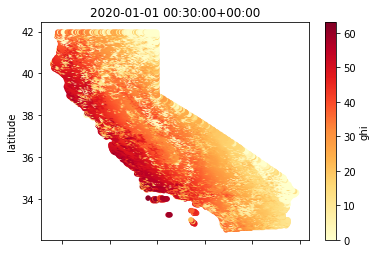

In [68]:
df.plot.scatter(x='longitude', y='latitude', c='ghi',
                colormap='YlOrRd',
                title=str(time_index[timestep]))
plt.show()